In [1]:
import time; start = time.time()
from datetime import datetime; print(datetime.now().strftime("%B %d, %Y %H:%M:%S"))

June 10, 2024 21:22:40


In [2]:
# CCLE_GeneExpression_v01
# Alberto Bejarano 2024

In [3]:
import warnings; warnings.filterwarnings("ignore") 
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
#        -         -        -        -         -        -         -        -        -         -
import pandas as pd
pd.set_option('display.precision',   2)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width',       1000)
pd.options.display.float_format = '{:.3f}'.format
#        -         -        -        -         -        -         -        -        -         -
from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator
from statannot import add_stat_annotation
import matplotlib.pyplot as plt
import urllib.request
import seaborn as sns
import numpy as np
import mmap
import os

In [4]:
#url = "https://data.broadinstitute.org/ccle/CCLE_RNAseq_genes_rpkm_20180929.gct.gz"
# file = urllib.request.urlopen(expression_link); print("File Size:", f"{(file.length/(1024*1024)):,.0f}", " MB")

In [5]:
#%%time
#df = pd.read_csv(url, index_col=None, compression='gzip', header=0,sep='\t',quotechar='"',skiprows=2,error_bad_lines=False)

In [6]:
expression_link = "./data/CCLE_RNAseq_rsem_genes_tpm_20180929.txt.gz"
expression_link = "./data/CCLE_RNAseq_genes_rpkm_20180929.gct.gz"
print("File Size:", f"{(os.stat(expression_link).st_size/(1024*1024)):,.0f}", " MB")

File Size: 137  MB


In [7]:
%%time
df = pd.read_csv(expression_link, compression='gzip', index_col=False, header=0, sep='\t', quotechar='"', skiprows=2, on_bad_lines = "warn")

CPU times: total: 13.3 s
Wall time: 13.3 s


In [8]:
df.sample()

,Name,Description,22RV1_PROSTATE,2313287_STOMACH,253JBV_URINARY_TRACT,253J_URINARY_TRACT,42MGBA_CENTRAL_NERVOUS_SYSTEM,5637_URINARY_TRACT,59M_OVARY,639V_URINARY_TRACT,647V_URINARY_TRACT,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,769P_KIDNEY,786O_KIDNEY,8305C_THYROID,8505C_THYROID,8MGBA_CENTRAL_NERVOUS_SYSTEM,A101D_SKIN,A1207_CENTRAL_NERVOUS_SYSTEM,A172_CENTRAL_NERVOUS_SYSTEM,A204_SOFT_TISSUE,A2058_SKIN,A253_SALIVARY_GLAND,A2780_OVARY,A375_SKIN,A3KAW_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,A427_LUNG,A498_KIDNEY,A4FUK_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,A549_LUNG,A673_BONE,A704_KIDNEY,ABC1_LUNG,ACCMESO1_PLEURA,ACHN_KIDNEY,AGS_STOMACH,ALLSIL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,AM38_CENTRAL_NERVOUS_SYSTEM,AML193_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,AMO1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,AN3CA_ENDOMETRIUM,ASPC1_PANCREAS,AU565_BREAST,BC3C_URINARY_TRACT,BCP1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BCPAP_THYROID,BDCM_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BEN_LUNG,BFTC905_URINARY_TRACT,BFTC909_KIDNEY,BHT101_THYROID,BHY_UPPER_AERODIGESTIVE_TRACT,BICR16_UPPER_AERODIGESTIVE_TRACT,BICR18_UPPER_AERODIGESTIVE_TRACT,BICR22_UPPER_AERODIGESTIVE_TRACT,BICR31_UPPER_AERODIGESTIVE_TRACT,BICR56_UPPER_AERODIGESTIVE_TRACT,BICR6_UPPER_AERODIGESTIVE_TRACT,BL41_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BL70_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BT12_SOFT_TISSUE,BT20_BREAST,BT474_BREAST,BT483_BREAST,BT549_BREAST,BV173_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BXPC3_PANCREAS,C2BBE1_LARGE_INTESTINE,C32_SKIN,C8166_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CA46_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CACO2_LARGE_INTESTINE,CADOES1_BONE,CAKI1_KIDNEY,CAKI2_KIDNEY,CAL120_BREAST,CAL12T_LUNG,CAL148_BREAST,CAL27_UPPER_AERODIGESTIVE_TRACT,CAL29_URINARY_TRACT,CAL33_UPPER_AERODIGESTIVE_TRACT,CAL51_BREAST,CAL54_KIDNEY,CAL62_THYROID,CAL78_BONE,CAL851_BREAST,CALU1_LUNG,CALU3_LUNG,CALU6_LUNG,CAMA1_BREAST,CAOV3_OVARY,CAOV4_OVARY,CAPAN1_PANCREAS,CAPAN2_PANCREAS,CAS1_CENTRAL_NERVOUS_SYSTEM,CCFSTTG1_CENTRAL_NERVOUS_SYSTEM,CCK81_LARGE_INTESTINE,CFPAC1_PANCREAS,CH157MN_CENTRAL_NERVOUS_SYSTEM,CHAGOK1_LUNG,...,SW1353_BONE,SW1417_LARGE_INTESTINE,SW1463_LARGE_INTESTINE,SW1573_LUNG,SW1710_URINARY_TRACT,SW1783_CENTRAL_NERVOUS_SYSTEM,SW1990_PANCREAS,SW403_LARGE_INTESTINE,SW480_LARGE_INTESTINE,SW48_LARGE_INTESTINE,SW579_THYROID,SW620_LARGE_INTESTINE,SW780_URINARY_TRACT,SW837_LARGE_INTESTINE,SW900_LUNG,SW948_LARGE_INTESTINE,T173_FIBROBLAST,T24_URINARY_TRACT,T3M10_LUNG,T3M4_PANCREAS,T47D_BREAST,T84_LARGE_INTESTINE,T98G_CENTRAL_NERVOUS_SYSTEM,TALL1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,TC71_BONE,TCCPAN2_PANCREAS,TCCSUP_URINARY_TRACT,TE10_OESOPHAGUS,TE11_OESOPHAGUS,TE125T_FIBROBLAST,TE14_OESOPHAGUS,TE159T_FIBROBLAST,TE15_OESOPHAGUS,TE1_OESOPHAGUS,TE441T_SOFT_TISSUE,TE4_OESOPHAGUS,TE5_OESOPHAGUS,TE617T_SOFT_TISSUE,TE6_OESOPHAGUS,TE8_OESOPHAGUS,TE9_OESOPHAGUS,TEN_ENDOMETRIUM,TF1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,TGBC11TKB_STOMACH,THP1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,TIG3TD_FIBROBLAST,TM31_CENTRAL_NERVOUS_SYSTEM,TM87_SOFT_TISSUE,TO175T_FIBROBLAST,TOLEDO_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,TOV112D_OVARY,TOV21G_OVARY,TT2609C02_THYROID,TTC1240_SOFT_TISSUE,TTC549_SOFT_TISSUE,TTC642_SOFT_TISSUE,TTC709_SOFT_TISSUE,TT_OESOPHAGUS,TT_THYROID,TUHR10TKB_KIDNEY,TUHR14TKB_KIDNEY,TUHR4TKB_KIDNEY,TYKNU_OVARY,U118MG_CENTRAL_NERVOUS_SYSTEM,U178_CENTRAL_NERVOUS_SYSTEM,U251MG_CENTRAL_NERVOUS_SYSTEM,U266B1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,U2OS_BONE,U343_CENTRAL_NERVOUS_SYSTEM,U87MG_CENTRAL_NERVOUS_SYSTEM,U937_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,UACC257_SKIN,UACC62_SKIN,UACC812_BREAST,UACC893_BREAST,UBLC1_URINARY_TRACT,UMUC1_URINARY_TRACT,UMUC3_URINARY_TRACT,UO31_KIDNEY,UOK101_KIDNEY,VCAP_PROSTATE,VMCUB1_URINARY_TRACT,VMRCRCW_KIDNEY,VMRCRCZ_KIDNEY,WM115_SKIN,WM1799_SKIN,WM2664_SKIN,WM793_SKIN,WM88_SKIN,WM983B_SKIN,WSUDLCL2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,YAPC_PANCREAS,YD10B_UPPER_AERODIGESTIVE_TRACT,YD15_SALIVARY_GLAND,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,YH13_CENTRAL_NERVOUS_SYSTEM,YKG1_CENTRAL_NERVOUS_SYSTEM,ZR751_BREAST,ZR7530_BREA

In [9]:
df.drop(['Name'],axis=1,inplace=True)
df.rename({'Description':'GeneSymbol'},axis=1,inplace=True)

In [10]:
df0 = df.iloc[:, 0:8]; df0.columns.tolist()

['GeneSymbol',
 '22RV1_PROSTATE',
 '2313287_STOMACH',
 '253JBV_URINARY_TRACT',
 '253J_URINARY_TRACT',
 '42MGBA_CENTRAL_NERVOUS_SYSTEM',
 '5637_URINARY_TRACT',
 '59M_OVARY']

In [11]:
df = df.set_index('GeneSymbol').transpose()
df.reset_index(inplace=True)
df.rename_axis(None, axis=1, inplace=True)

In [12]:
df = df.rename(columns = {'index': 'Cell_line'})
df[['Cell_line','Tissue']] = df['Cell_line'].str.split('_', n=1, expand=True)

In [13]:
first_column = df.pop("Tissue"); df.insert(0,'Tissue', first_column)
first_column = df.pop("Cell_line"); df.insert(0,'Cell_line', first_column)

In [14]:
tissuess = list(set(list(df['Tissue'])));print(tissuess)

['CERVIX', 'OESOPHAGUS', 'BONE', 'URINARY_TRACT', 'PROSTATE', 'SOFT_TISSUE', 'SALIVARY_GLAND', 'BREAST', 'PANCREAS', 'OVARY', 'SKIN', 'THYROID', 'UPPER_AERODIGESTIVE_TRACT', 'HAEMATOPOIETIC_AND_LYMPHOID_TISSUE', 'LUNG', 'KIDNEY', 'FIBROBLAST', 'STOMACH', 'ENDOMETRIUM', 'LIVER', 'AUTONOMIC_GANGLIA', 'CENTRAL_NERVOUS_SYSTEM', 'LARGE_INTESTINE', 'BILIARY_TRACT', 'SMALL_INTESTINE', 'PLEURA']


In [15]:
#tissues = ["PROSTATE","STOMACH","URINARY_TRACT","BREAST"]
#tissues = ["PROSTATE","BREAST"]
#df = df[df['Tissue'].isin(tissues)]

In [16]:
df2 = pd.melt(df,id_vars=['Tissue','Cell_line'],var_name='GeneSymbol',value_name='GeneExpression')

In [17]:
print(df2.sample(5))

                          Tissue Cell_line     GeneSymbol  GeneExpression
46547817  CENTRAL_NERVOUS_SYSTEM    SW1088            GH1           0.000
14258132              FIBROBLAST    HS343T      RNU6-583P           0.000
13161631                    LUNG   HCC2935  RP11-100N21.1           0.409
45103633                PROSTATE   NCIH660   RP11-381P6.1           0.000
13279104             ENDOMETRIUM    MFE280         SRD5A3           7.363


In [18]:
#GenesOfInterest = ["DDX11L1", "PLD1"]
#df2 = df2[df2['GeneSymbol'].isin(GenesOfInterest)]

In [19]:
GeneOfInterest = "FERP1"
df2 = df2[df2['GeneSymbol'] == GeneOfInterest]

In [20]:
df2['GeneExpression'] = np.log2(df2['GeneExpression']+0.1)

In [21]:
print(df2.sample(5))

                                      Tissue    Cell_line GeneSymbol  GeneExpression
56075265  HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  P12ICHIKAWA      FERP1          -0.157
56075229                             STOMACH        NUGC2      FERP1          -2.891
56075105                   AUTONOMIC_GANGLIA          NB1      FERP1          -0.675
56075356                              BREAST        SKBR3      FERP1          -2.869
56075496                       URINARY_TRACT       TCCSUP      FERP1          -1.965


In [22]:
df2.shape

(1019, 4)

In [23]:
Tissues = list(set(list(df2['Tissue'])));print(Tissues)

['CERVIX', 'OESOPHAGUS', 'BONE', 'URINARY_TRACT', 'PROSTATE', 'SOFT_TISSUE', 'SALIVARY_GLAND', 'BREAST', 'PANCREAS', 'OVARY', 'SKIN', 'THYROID', 'UPPER_AERODIGESTIVE_TRACT', 'HAEMATOPOIETIC_AND_LYMPHOID_TISSUE', 'LUNG', 'KIDNEY', 'FIBROBLAST', 'STOMACH', 'ENDOMETRIUM', 'LIVER', 'AUTONOMIC_GANGLIA', 'CENTRAL_NERVOUS_SYSTEM', 'LARGE_INTESTINE', 'BILIARY_TRACT', 'SMALL_INTESTINE', 'PLEURA']


In [24]:
#df2 = df2.sample(frac=0.5, replace=False, random_state=1)

In [25]:
df2.shape

(1019, 4)

In [26]:
palette = sns.color_palette("YlGn", n_colors=25)
palette = sns.color_palette("pastel")

In [27]:
palette

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [28]:
tissue_order = ['THYROID', 'STOMACH', 'BREAST', 'PANCREAS', 'OESOPHAGUS', 'URINARY_TRACT', 'BONE', 'SKIN', 'FIBROBLAST',
                'CERVIX', 'LUNG', 'PROSTATE', 'PLEURA', 'OVARY', 'KIDNEY', 'ENDOMETRIUM', 'LIVER', 'SALIVARY_GLAND','SOFT_TISSUE']

In [29]:
pairs = [('CERVIX', 'SKIN'), ('FIBROBLAST', 'SKIN'), ('LUNG', 'SKIN'), ('PROSTATE', 'SKIN')]

In [30]:
hue_plot_params = {'data':df2, 'x':"Tissue", 'y':'GeneExpression', "palette":palette}

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

SKIN vs. FIBROBLAST: Mann-Whitney-Wilcoxon test two-sided, P_val:6.422e-06 U_stat=1.424e+03
SKIN vs. CERVIX: Mann-Whitney-Wilcoxon test two-sided, P_val:4.145e-02 U_stat=2.200e+01
SKIN vs. LUNG: Mann-Whitney-Wilcoxon test two-sided, P_val:7.494e-03 U_stat=3.462e+03
SKIN vs. PROSTATE: Mann-Whitney-Wilcoxon test two-sided, P_val:1.328e-02 U_stat=9.000e+01


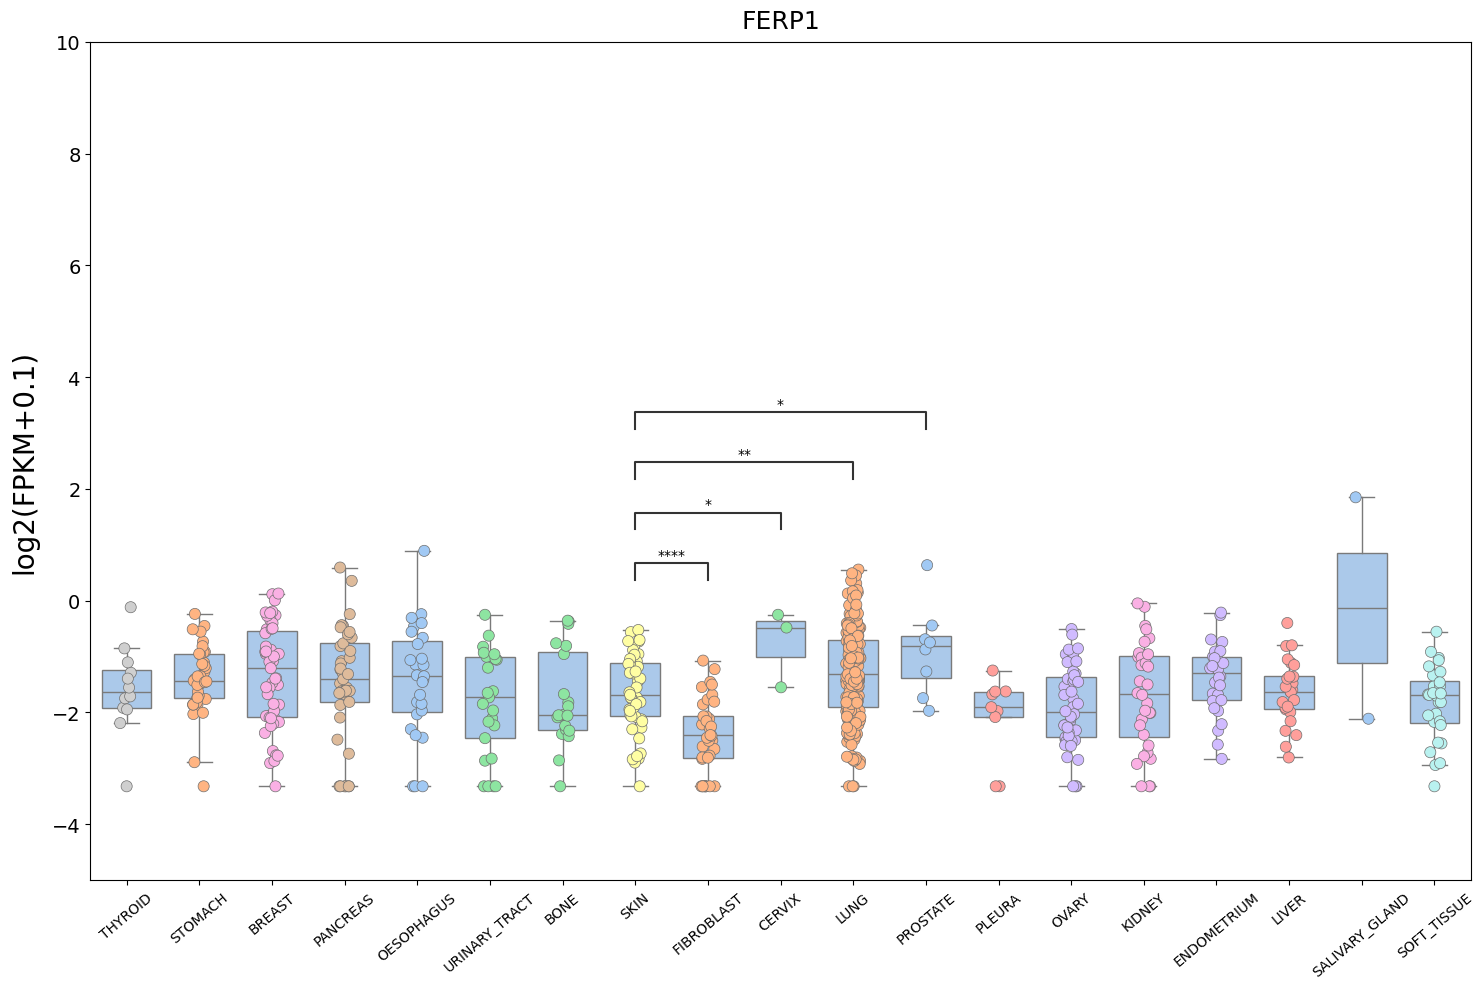

CPU times: total: 13.2 s
Wall time: 13.2 s


In [31]:
%%time
fig, ax = plt.subplots(figsize=(15, 10))
plt.subplots_adjust(wspace=0.02, hspace=0.01)
sns.plotting_context("notebook", font_scale = 1.4)

ax = sns.boxplot(ax=ax, data=df2, x='Tissue', y='GeneExpression', order = tissue_order, hue="GeneSymbol",
                 palette = palette, width=0.7, fliersize=0, linewidth=1)
handles, labels = ax.get_legend_handles_labels()
ax = sns.stripplot(data=df2, x="Tissue", y="GeneExpression", order = tissue_order, hue="Tissue", jitter=True,
                   dodge=True, palette=palette, linewidth=0.5, size=8, split=False, edgecolor='gray', alpha=1)
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.1)
plt.gca().set_yscale('linear'); plt.ylim(-5, 10) 
ax.set_title(GeneOfInterest, fontsize=18, pad=10)
plt.xlabel("", labelpad=10); plt.ylabel("log2(FPKM+0.1)", fontsize=20, labelpad=10) 
plt.xticks(fontsize = 10, rotation = 40); plt.yticks(fontsize=14, rotation=0)
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor(); patch.set_facecolor((r, g, b,.2))
try:
    annotator = Annotator(ax, pairs, order=tissue_order, **hue_plot_params)
    annotator.configure(test='Mann-Whitney', text_format='star').apply_and_annotate()
except (ValueError) as i:
    print("\nValueError: " + str(i) + "\n")
#          -          -          -          -          -          -          -          -          -          -          -     
plt.legend([],[],frameon=False)
plt.tight_layout()
plt.show()

In [32]:
print("'CPTAC_FragPipe_DEG_Cluster_v01' script run time:", f'{time.time()-start:.0f}', "seconds.")

'CPTAC_FragPipe_DEG_Cluster_v01' script run time: 48 seconds.
